In [1]:
import pandas as pd

In [ ]:
# read household data
filepath = '2023/SNHR8RDT/SNHR8RFL.DTA'
# hh_raw = household data without any conversion
hh_raw = pd.read_stata(filepath, convert_categoricals=False)

# convert all columns that are int8 to int32
for col in hh_raw.columns:
    if hh_raw[col].dtype == 'int8':
        hh_raw[col] = hh_raw[col].astype('int32')

hh_raw

,hhid,hv000,hv001,hv002,hv003,hv004,hv005,hv006,hv007,hv008,...,sh175e_3,sh175f_1,sh175f_2,sh175f_3,sh175g_1,sh175g_2,sh175g_3,sh175h_1,sh175h_2,sh175h_3
0,1 1,SN8,1,1,1,1,1308253,2,2023,1478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1 2,SN8,1,2,1,1,1308253,2,2023,1478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1 3,SN8,1,3,1,1,1308253,2,2023,1478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1 4,SN8,1,4,2,1,1308253,2,2023,1478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1 5,SN8,1,5,1,1,1308253,2,2023,1478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8418,400 18,SN8,400,18,2,400,380997,2,2023,1478,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
8419,400 19,SN8,400,19,1,400,380997,2,2023,1478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8420,400 20,SN8,400,20,1,400,380997,2,2023,1478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8421,400 21,SN8,400,21,1,400,380997,2,2023,1478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# select all household columns that start with 'hv2' and 'hv001'
all_columns = hh_raw.columns
columns_we_want = [col for col in all_columns if col.startswith('hv2')]
columns_we_want.append('hv001')
# hh_clean = household data with only columns of household characteristics
hh_clean = hh_raw[columns_we_want]
#rename columns
mapping = {'hv001': 'cluster'}
hh_clean = hh_clean.rename(columns=mapping)
# replace all values of NaN with 0
hh_clean = hh_clean.fillna(0)
hh_clean

,hv201,hv202,hv201a,hv201b,hv204,hv205,hv206,hv207,hv208,hv209,...,hv259,hv260,hv261,hv262,hv263,hv270,hv271,hv270a,hv271a,cluster
0,11,0.0,0.0,0,996,12,1,1,1,0,...,5,1.0,10,1,1,4,74726,2,10409,1
1,14,0.0,0.0,0,5,11,1,1,1,1,...,4,0.0,10,1,1,4,112922,3,61765,1
2,11,0.0,0.0,0,996,12,1,1,1,1,...,5,1.0,10,1,1,5,161280,5,126783,1
3,11,0.0,0.0,0,996,11,1,0,1,1,...,95,0.0,95,1,1,5,121004,4,72631,1
4,11,0.0,0.0,0,996,11,1,0,1,0,...,95,0.0,95,1,0,3,47440,1,-26278,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8418,32,0.0,0.0,0,0,12,1,0,0,0,...,95,0.0,95,1,1,2,-64806,3,-9267,400
8419,31,0.0,0.0,1,996,23,1,0,1,0,...,95,0.0,95,1,0,2,-40360,3,20987,400
8420,32,0.0,0.0,0,996,31,1,1,1,1,...,95,0.0,95,1,1,2,-24711,3,40355,400
8421,31,0.0,0.0,0,5,43,1,1,0,0,...,5,0.0,1,1,1,2,-57112,3,255,400


In [66]:
# base on assest, we use household characteristics with variables HV2XX to construct the wealth index
# HV210 = Bicycle
# HV211 = Motorcycle

#hh_clean['my_wealth_index'] = 50 * hh_clean['bike'] + 200 * hh_clean['motorcycle']
hh_clean['my_wealth_index'] = hh_clean['wealth_index_DHS']


In [67]:
hh_clean

,hhid,cluster,bike,motorcycle,wealth_index_DHS,my_wealth_index
0,1 1,1,0,0,74726,74726
1,1 2,1,0,0,112922,112922
2,1 3,1,1,1,161280,161280
3,1 4,1,0,0,121004,121004
4,1 5,1,0,0,47440,47440
...,...,...,...,...,...,...
8418,400 18,400,1,0,-64806,-64806
8419,400 19,400,1,0,-40360,-40360
8420,400 20,400,1,0,-24711,-24711
8421,400 21,400,1,0,-57112,-57112


In [68]:
# read GPS data for senegal 2023
filepath = '2023/SNGE8RFL/SNGE8RFL.shp'

import geopandas as gpd
gps23_raw = gpd.read_file(filepath)

In [69]:
gps23_raw

,DHSID,DHSCC,DHSYEAR,DHSCLUST,CCFIPS,ADM1FIPS,ADM1FIPSNA,ADM1SALBNA,ADM1SALBCO,ADM1DHS,...,DHSREGCO,DHSREGNA,SOURCE,URBAN_RURA,LATNUM,LONGNUM,ALT_GPS,ALT_DEM,DATUM,geometry
0,SN202300000001,SN,2023.0,1.0,SG,NULL,NULL,NULL,NULL,1.0,...,1.0,Dakar,CEN,U,14.710267,-17.439639,9999.0,19.0,WGS84,POINT (-17.43964 14.71027)
1,SN202300000002,SN,2023.0,2.0,SG,NULL,NULL,NULL,NULL,1.0,...,1.0,Dakar,CEN,U,14.715173,-17.462959,9999.0,21.0,WGS84,POINT (-17.46296 14.71517)
2,SN202300000003,SN,2023.0,3.0,SG,NULL,NULL,NULL,NULL,1.0,...,1.0,Dakar,CEN,U,14.699729,-17.443807,9999.0,9.0,WGS84,POINT (-17.44381 14.69973)
3,SN202300000004,SN,2023.0,4.0,SG,NULL,NULL,NULL,NULL,1.0,...,1.0,Dakar,CEN,U,14.724768,-17.447563,9999.0,18.0,WGS84,POINT (-17.44756 14.72477)
4,SN202300000005,SN,2023.0,5.0,SG,NULL,NULL,NULL,NULL,1.0,...,1.0,Dakar,CEN,U,14.698593,-17.461012,9999.0,21.0,WGS84,POINT (-17.46101 14.69859)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,SN202300000396,SN,2023.0,396.0,SG,NULL,NULL,NULL,NULL,14.0,...,14.0,Sedhiou,CEN,R,12.808935,-15.588378,9999.0,25.0,WGS84,POINT (-15.58838 12.80893)
395,SN202300000397,SN,2023.0,397.0,SG,NULL,NULL,NULL,NULL,14.0,...,14.0,Sedhiou,CEN,R,12.848612,-15.388794,9999.0,11.0,WGS84,POINT (-15.38879 12.84861)
396,SN202300000398,SN,2023.0,398.0,SG,NULL,NULL,NULL,NULL,14.0,...,14.0,Sedhiou,CEN,R,12.715828,-15.943879,9999.0,36.0,WGS84,POINT (-15.94388 12.71583)
397,SN202300000399,SN,2023.0,399.0,SG,NULL,NULL,NULL,NULL,14.0,...,14.0,Sedhiou,CEN,R,12.916037,-15.781703,9999.0,22.0,WGS84,POINT (-15.7817 12.91604)


In [70]:
gps23_raw.columns

Index(['DHSID', 'DHSCC', 'DHSYEAR', 'DHSCLUST', 'CCFIPS', 'ADM1FIPS',
       'ADM1FIPSNA', 'ADM1SALBNA', 'ADM1SALBCO', 'ADM1DHS', 'ADM1NAME',
       'DHSREGCO', 'DHSREGNA', 'SOURCE', 'URBAN_RURA', 'LATNUM', 'LONGNUM',
       'ALT_GPS', 'ALT_DEM', 'DATUM', 'geometry'],
      dtype='object')

In [71]:
columns_we_want = ['DHSCLUST', 'geometry']
gps23_clean = gps23_raw[columns_we_want]
#rename columns
mapping = {'DHSCLUST': 'cluster', 'geometry': 'geometry'}
gps23_clean =gps23_clean.rename(columns=mapping)
gps23_clean

,cluster,geometry
0,1.0,POINT (-17.43964 14.71027)
1,2.0,POINT (-17.46296 14.71517)
2,3.0,POINT (-17.44381 14.69973)
3,4.0,POINT (-17.44756 14.72477)
4,5.0,POINT (-17.46101 14.69859)
...,...,...
394,396.0,POINT (-15.58838 12.80893)
395,397.0,POINT (-15.38879 12.84861)
396,398.0,POINT (-15.94388 12.71583)
397,399.0,POINT (-15.7817 12.91604)


In [72]:
# Step 1: Group hh_clean by 'cluster' and calculate the average wealth index
cluster_avg_wealth = hh_clean.groupby('cluster')['my_wealth_index'].mean().reset_index()

# Step 2: Merge with gps23_clean on 'cluster'
gps23_clean = gps23_clean.merge(cluster_avg_wealth, on='cluster', how='left')

# rename the column
gps23_clean = gps23_clean.rename(columns={'my_wealth_index': 'avg_wealth_index'})

gps23_clean

,cluster,geometry,avg_wealth_index
0,1.0,POINT (-17.43964 14.71027),117875.000000
1,2.0,POINT (-17.46296 14.71517),141577.545455
2,3.0,POINT (-17.44381 14.69973),130297.684211
3,4.0,POINT (-17.44756 14.72477),123832.066667
4,5.0,POINT (-17.46101 14.69859),117929.000000
...,...,...,...
394,396.0,POINT (-15.58838 12.80893),-107262.272727
395,397.0,POINT (-15.38879 12.84861),-96941.045455
396,398.0,POINT (-15.94388 12.71583),-100397.500000
397,399.0,POINT (-15.7817 12.91604),-98269.818182


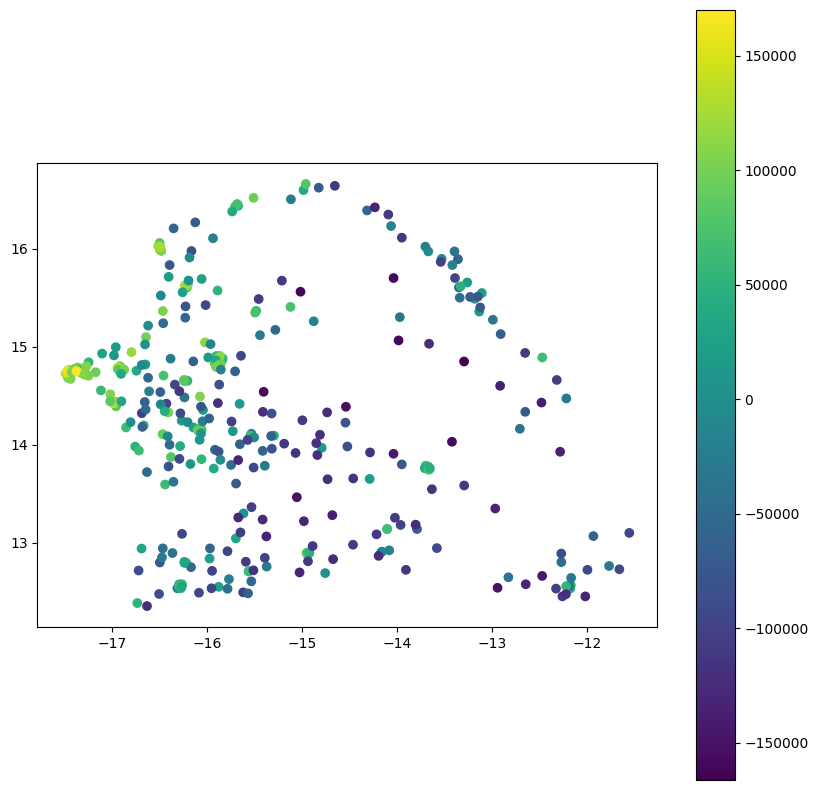

In [73]:
# plot the map
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gps23_clean.plot(column='avg_wealth_index', ax=ax, legend=True)
plt.show()


In [80]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

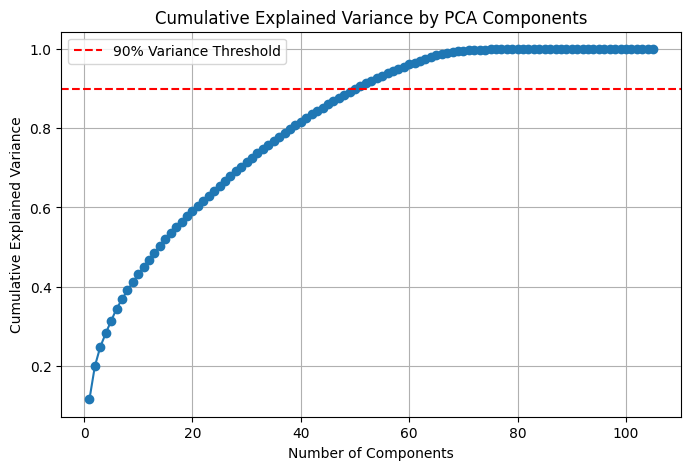

In [84]:
# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(hh_clean)

# Step 2: Fit PCA without specifying the number of components
pca = PCA()
pca.fit(scaled_data)

# Step 3: Calculate cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.legend()
plt.grid()
plt.show()

In [87]:
# Find the number of components explaining 90% variance
num_components_90 = (cumulative_variance >= 0.90).argmax() + 1
print(f"Number of components to explain 90% variance: {num_components_90}")

# Find the number of components explaining 95% variance
num_components_95 = (cumulative_variance >= 0.95).argmax() + 1
print(f"Number of components to explain 95% variance: {num_components_95}")

Number of components to explain 90% variance: 51
Number of components to explain 95% variance: 58


In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier  # Example model

# Example: Iterate over different numbers of components
scores = []
for n in range(1, num_components_90 + 1):
    pca = PCA(n_components=n)
    reduced_data = pca.fit_transform(scaled_data)
    model = RandomForestClassifier(random_state=42)
    score = cross_val_score(model, reduced_data, target, cv=5).mean()  # Assuming `target` is defined
    scores.append(score)

# Plot cross-validation scores
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_components_90 + 1), scores, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cross-Validation Score')
plt.title('Model Performance vs. Number of PCA Components')
plt.grid()
plt.show()

NameError: name 'target' is not defined

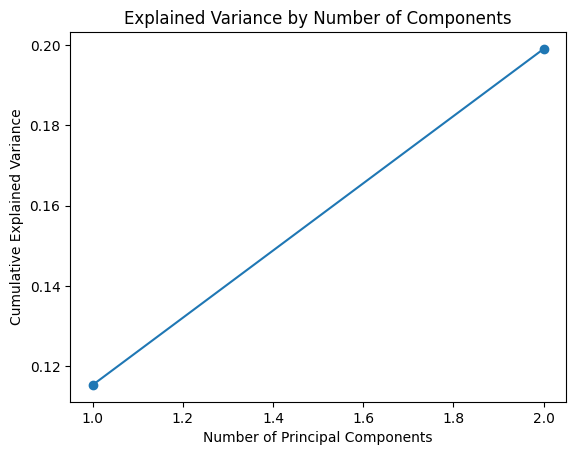

In [83]:
import matplotlib.pyplot as plt

# Cumulative explained variance
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.show()